In [98]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [99]:
df = pd.read_csv('creditcard.csv')

In [100]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [101]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142109,84580.0,-0.584,1.273,1.188,0.014,0.006,-1.018,0.676,-0.057,-0.191,...,-0.296,-0.719,-0.006,0.323,-0.111,0.077,0.352,0.162,2.78,0
112024,72479.0,1.430,-0.990,-0.224,-1.809,0.771,3.731,-1.914,1.036,-0.317,...,0.376,0.929,-0.108,1.049,0.481,-0.026,0.063,0.025,0.02,0
252237,155716.0,-0.374,1.060,0.488,-0.036,0.466,-0.759,0.927,-0.353,-0.280,...,-0.122,-0.353,0.057,-0.061,-0.823,0.263,-0.265,0.193,1.29,0
56879,47647.0,1.093,0.325,1.411,2.799,-0.746,-0.129,-0.319,0.020,-0.151,...,0.106,0.502,-0.073,0.757,0.514,0.126,0.034,0.035,14.45,0
131386,79581.0,1.211,0.630,-0.455,0.899,0.154,-1.171,0.352,-0.210,-0.219,...,-0.103,-0.197,-0.016,0.293,0.460,0.378,-0.013,0.043,0.76,0


In [102]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [103]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


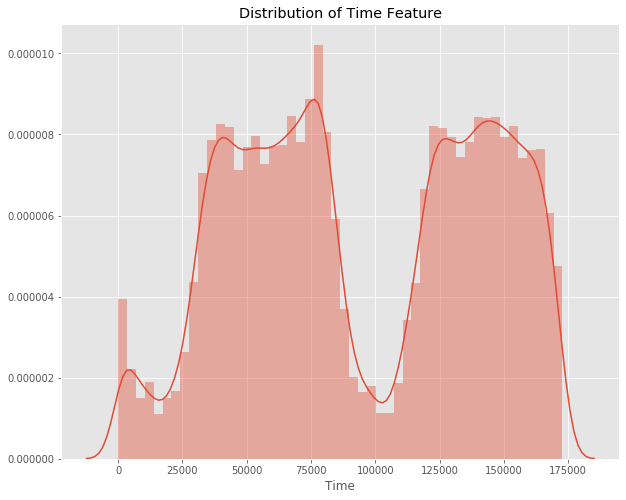

In [104]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

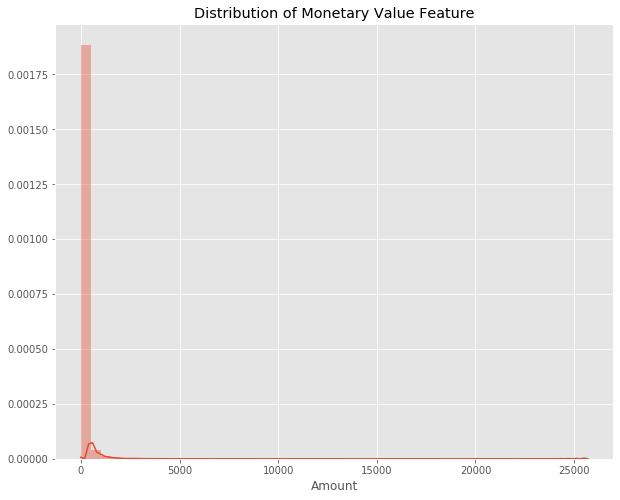

In [105]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [106]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

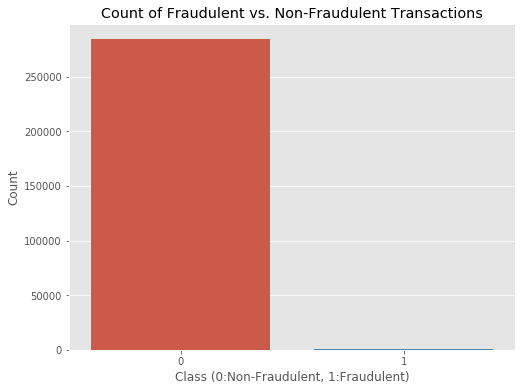

In [107]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [108]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

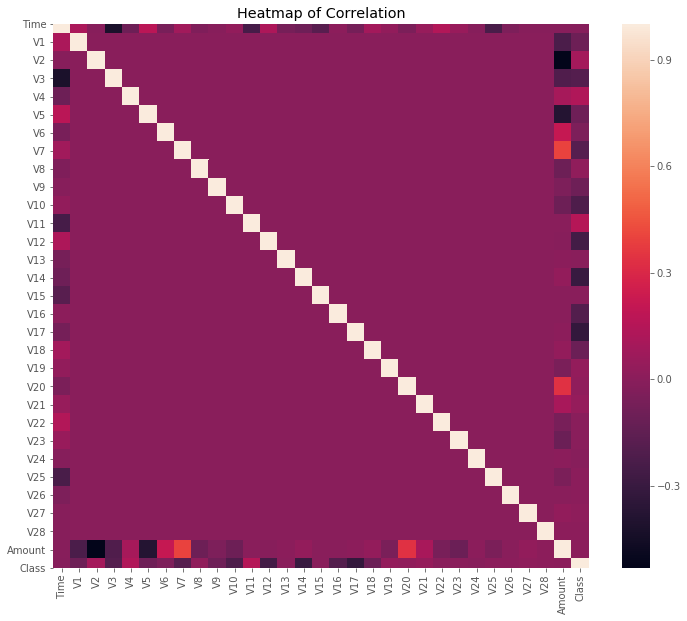

In [109]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [110]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [112]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [113]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
71646,54378.0,-0.403,0.931,1.124,-0.168,0.318,-0.034,0.430,0.309,-0.435,...,-0.025,-0.396,-0.265,0.109,0.250,0.078,1.99,0,-0.345,-0.851
47139,43099.0,1.130,0.586,0.174,2.376,0.258,-0.187,0.317,0.051,-1.172,...,-0.049,0.207,0.565,0.071,-0.034,-0.004,2.29,0,-0.344,-1.089
221982,142773.0,1.915,-0.433,-0.725,1.141,-0.235,0.108,-0.523,0.086,1.169,...,-0.018,-1.112,-0.029,-0.495,0.040,-0.034,61.60,0,-0.107,1.010
92644,64028.0,0.977,-0.020,0.547,1.582,-0.480,-0.463,0.190,-0.076,0.232,...,-0.066,0.621,0.566,-0.354,0.027,0.035,86.19,0,-0.009,-0.648
94754,65016.0,1.444,-1.131,0.274,-1.553,-1.220,-0.058,-1.142,0.100,-1.969,...,0.015,-0.340,0.300,-0.172,0.036,0.004,20.00,0,-0.273,-0.627


In [114]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [115]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256124, 31)
Test Shape: (28683, 31)


In [116]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [117]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 448 fraudulent transactions in the train data.


In [118]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [119]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
186958,-0.745,-4.744,-4.038,0.930,-0.566,-0.337,2.618,-0.774,-0.122,-0.521,...,-0.444,-1.454,-0.910,-0.095,0.055,-0.369,0.165,0,5.660,0.886
75575,1.259,-0.074,0.310,-0.109,-0.521,-0.709,-0.170,-0.040,0.401,-0.204,...,-0.266,0.089,0.119,0.134,0.993,-0.074,-0.002,0,-0.350,-0.730
138564,1.956,-0.493,-0.059,0.232,-0.449,0.627,-1.142,0.229,2.400,-0.242,...,0.077,0.298,0.191,-0.583,0.421,-0.045,-0.051,0,-0.293,0.127
195468,-4.704,-2.282,-1.775,-0.354,3.117,-2.056,1.643,-2.164,1.190,1.676,...,1.166,2.426,0.711,0.724,0.248,1.516,-0.552,0,-0.248,0.970
240470,1.942,0.778,-1.414,3.826,0.910,-0.744,0.927,-0.440,-1.468,1.502,...,0.468,-0.040,0.069,0.434,0.165,-0.078,-0.063,0,-0.249,1.431


In [120]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [121]:
subsample = pd.concat([selected, fraud])
len(subsample)

896

In [122]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-2.434,3.226,-6.596,3.593,-1.079,-1.740,-0.047,0.301,-1.779,-5.836,...,-0.419,0.157,-0.715,0.469,-0.349,0.420,-0.328,1,1.096,0.736
1,-0.680,4.673,-6.815,7.144,0.929,-1.873,-2.307,0.994,-4.944,-5.576,...,-0.322,-0.281,-1.120,-0.073,0.554,0.761,0.387,1,-0.350,1.260
2,-0.323,1.183,-0.760,0.153,0.406,-1.468,0.538,0.101,1.206,-1.366,...,0.754,-0.067,-0.098,-0.336,-0.179,0.228,0.094,0,-0.227,0.050
3,1.194,-0.571,0.743,-0.015,-0.625,0.832,-0.833,0.273,1.169,-0.372,...,0.207,-0.265,-0.679,0.512,1.247,-0.029,-0.006,1,-0.226,-0.620
4,-0.870,0.868,-2.259,-0.281,0.870,-1.454,1.796,-0.503,-0.128,0.663,...,1.964,0.223,0.086,-1.121,-0.231,-0.348,0.242,0,-0.034,0.744
5,-2.097,2.753,-2.391,0.024,2.059,4.016,-2.873,-3.480,-1.497,-1.945,...,0.684,0.139,0.824,-0.185,-0.347,-0.013,0.211,0,-0.349,-0.804
6,-0.584,0.803,-0.961,-0.451,0.636,-0.841,1.104,0.139,-0.245,-0.656,...,0.345,0.183,0.669,-0.633,0.168,-0.062,0.127,0,-0.108,1.096
7,-0.613,0.200,2.358,-0.049,-0.488,1.272,-0.695,0.493,-0.691,0.452,...,0.093,-0.329,-0.035,0.388,-0.250,0.414,0.162,0,-0.273,1.083
8,1.339,0.689,-0.291,1.103,0.636,-0.643,0.536,-0.462,0.857,-0.364,...,-0.161,-0.255,-0.471,0.987,-0.287,-0.027,-0.001,0,-0.345,-1.866
9,1.853,1.070,-1.776,4.617,0.770,-0.401,-0.041,0.090,-0.218,-0.374,...,-0.176,0.027,-0.468,0.058,0.148,0.042,0.041,1,-0.349,1.173


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

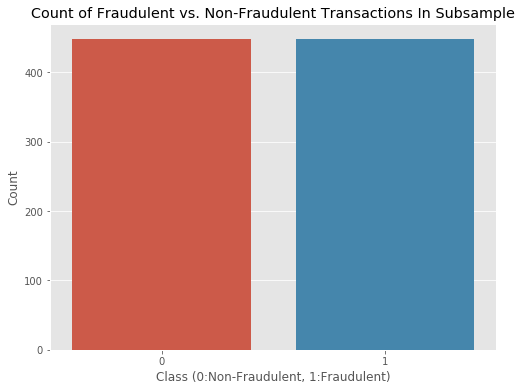

In [123]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [124]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.427
V2,0.477
V3,-0.565
V4,0.707
V5,-0.370
V6,-0.366
V7,-0.468
V8,0.034
V9,-0.570
V10,-0.625


In [125]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.565
V9,-0.570
V10,-0.625
V12,-0.676
V14,-0.747
V16,-0.590
V17,-0.554


In [126]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.707
V11,0.670
Class,1.000


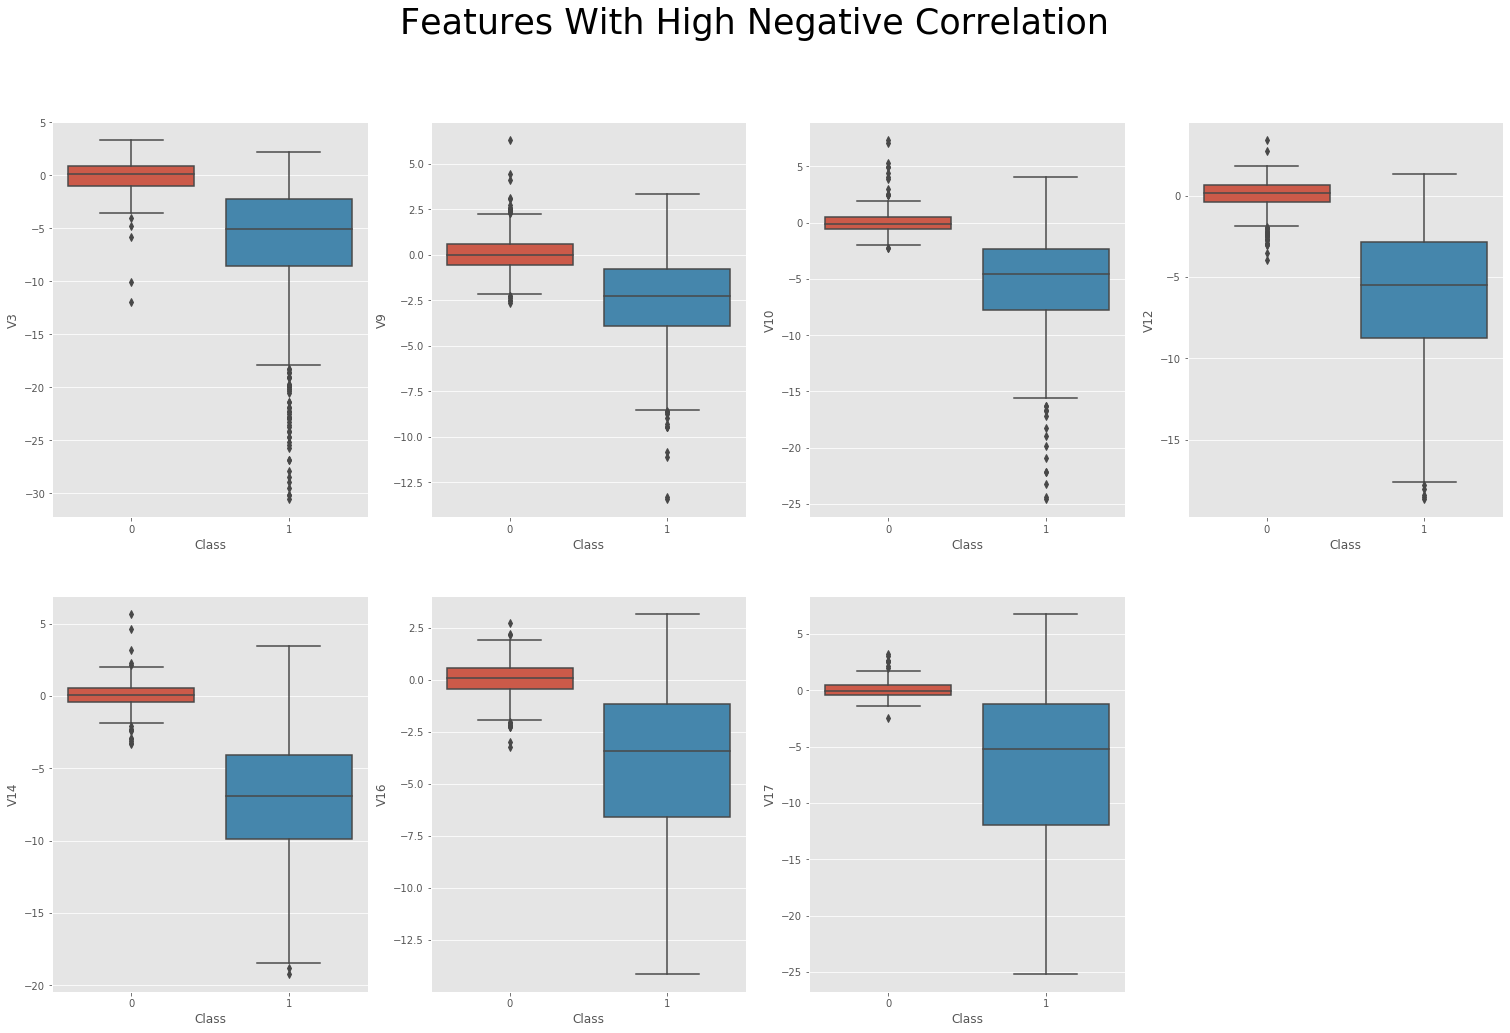

In [127]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

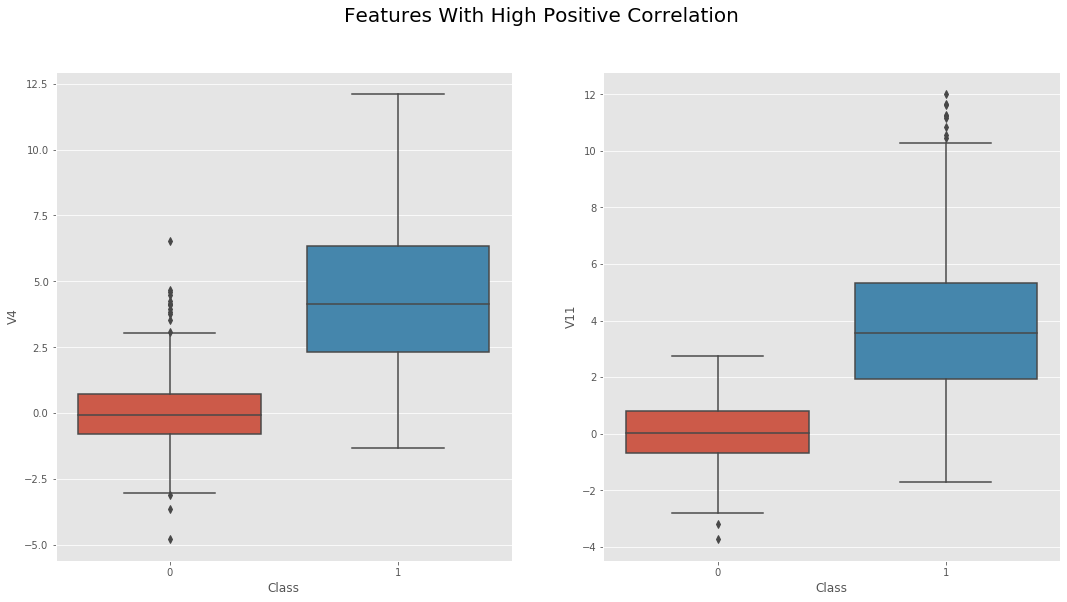

In [128]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [129]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [130]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 896 transactions by 267 transactions to 629 transactions.


**Dimensionality Reduction**

In [131]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [132]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

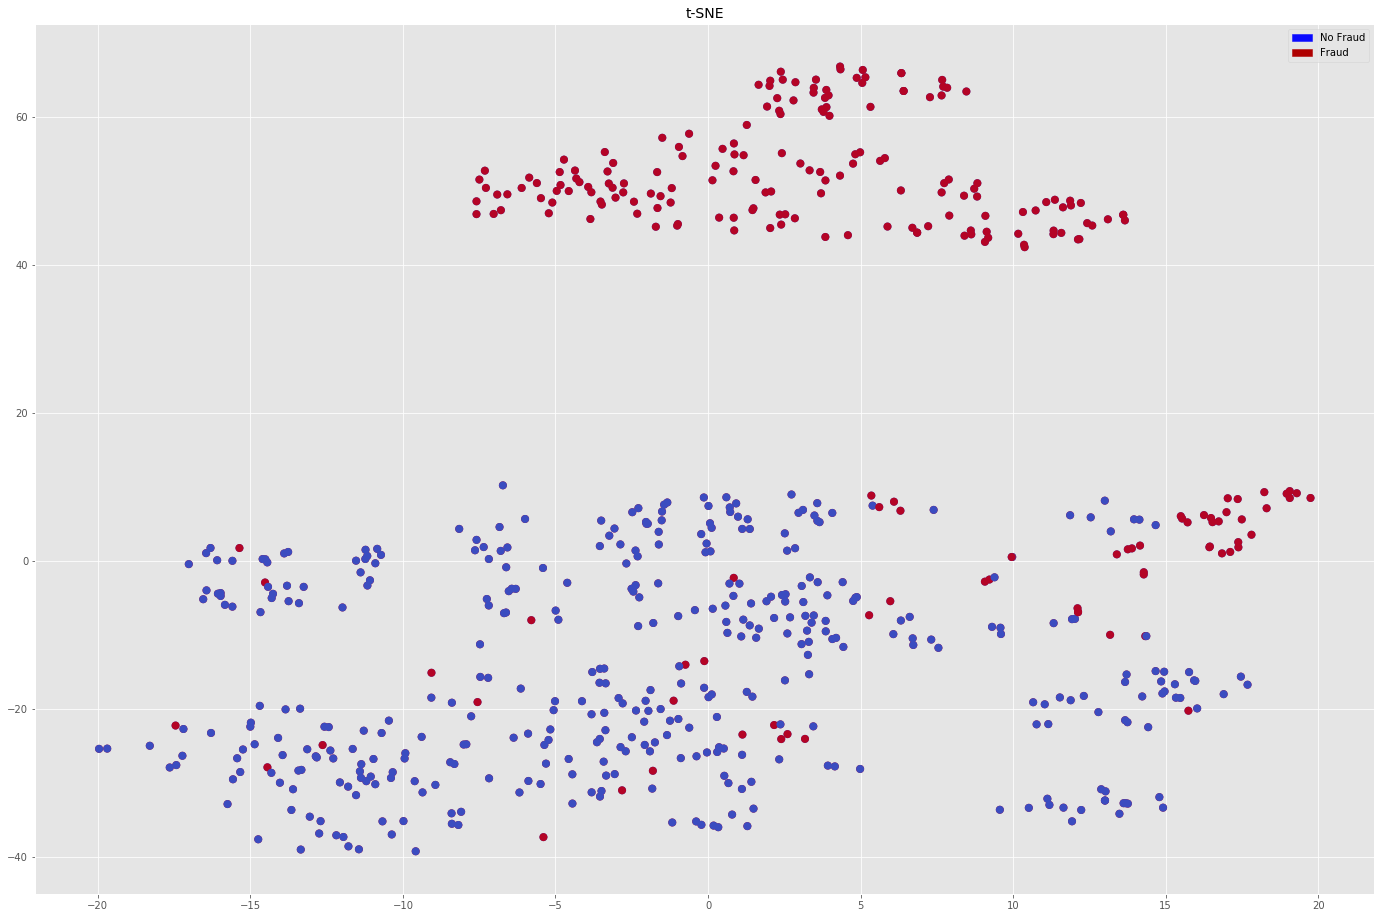

In [133]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [134]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [135]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [137]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (503, 30) (126, 30) 

Y_shapes:
 Y_train: Y_validation:
 (503,) (126,)


In [138]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [139]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.970345 (0.021627)
LDA: 0.967564 (0.026796)
KNN: 0.954853 (0.040108)
CART: 0.869286 (0.038227)
SVM: 0.960188 (0.041225)
XGB: 0.966147 (0.025347)
RF: 0.948891 (0.036126)


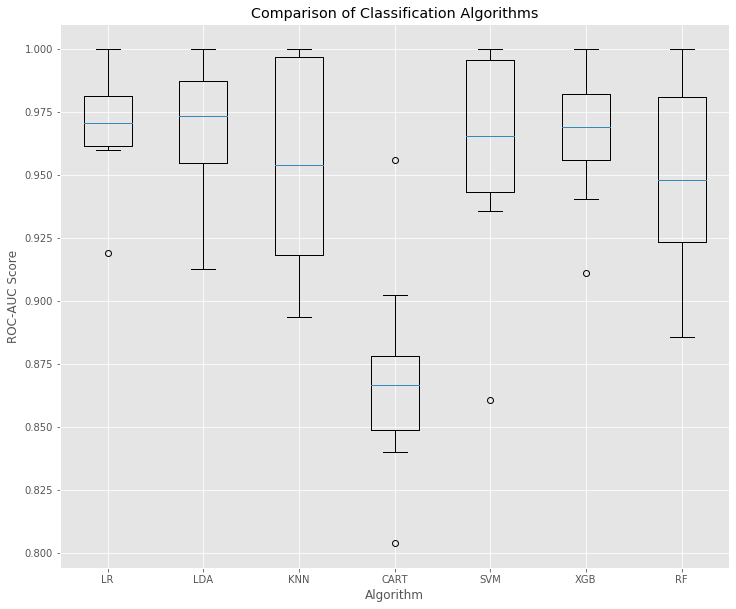

In [140]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()